In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로

font_prop = fm.FontProperties(fname = font_path) 


font_name = font_prop.get_name() # 폰트명

matplotlib.rc('font', family=font_name)

plt.rc('axes', unicode_minus=False) # matplotlib의 기본적인 유니코드 minus폰트사용 중지

In [25]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
"""
호텔 - Resort Hotel, City Hotel
취소여부 - 1이 취소 0은 유지(?) 취소 안함(?)
식사여부 - BB(Bed & Breakfast, 1끼) , HB(Half Board, 2끼), FB(Full Board,3끼), Undefined(미정), SC(Self-Catering)
예약방법 - Online TA (온라인 여행사), Offline TA/TO (오프라인 여행사),Aviation (항공) , Offline, Direc(직접), Corporate(기업-비즈니스 출장), Groups(단체), Complementary(무료), Undefined(모름)
유통채널 - Direct, Corporate, TA/TO(여행사/여행 도매업자 채널), GDS(Global Distribution System, 글로벌 유통 시스템), Undefined
보증금유형 - No Deposit(보증금 없음), Refundable(환불 가능 보증금), Non Refund(환불 불가 보증금)
고객유형 - Transient(일반 고객), Contract(계약 고객), Transient-Party(일반 단체 고객), Group(단체 고객, 하나의 주체(예: 여행사, 기업, 이벤트 주최자)가 여러 객실을 한 번에 예약하는 경우)
예약상태 - Check-Out(체크아웃), Canceled(취소됨), No-Show(노쇼)

"""

'\n호텔 - Resort Hotel, City Hotel\n취소여부 - 1이 취소 0은 유지(?) 취소 안함(?)\n식사여부 - BB(Bed & Breakfast, 1끼) , HB(Half Board, 2끼), FB(Full Board,3끼), Undefined(미정), SC(Self-Catering)\n예약방법 - Online TA (온라인 여행사), Offline TA/TO (오프라인 여행사),Aviation (항공) , Offline, Direc(직접), Corporate(기업-비즈니스 출장), Groups(단체), Complementary(무료), Undefined(모름)\n유통채널 - Direct, Corporate, TA/TO(여행사/여행 도매업자 채널), GDS(Global Distribution System, 글로벌 유통 시스템), Undefined\n보증금유형 - No Deposit(보증금 없음), Refundable(환불 가능 보증금), Non Refund(환불 불가 보증금)\n고객유형 - Transient(일반 고객), Contract(계약 고객), Transient-Party(일반 단체 고객), Group(단체 고객, 하나의 주체(예: 여행사, 기업, 이벤트 주최자)가 여러 객실을 한 번에 예약하는 경우)\n예약상태 - Check-Out(체크아웃), Canceled(취소됨), No-Show(노쇼)\n\n'

In [27]:
new_column_names = ['호텔', '취소여부', '리드타임(일)','도착연도','도착월','도착주차','도착일','주말숙박일수','주중숙박일수','성인수','어린이수','아이수','식사여부','출신국','예약방법','유통채널','재방문고객여부','고객과거취소건수','고객예약성공기록','예약객실유형','배정객실유형','예약변경수','보증금유형','에이전트ID','회사ID','예약대기목록에있었던기간','고객유형','1박당평균요금','요청한주차공간수','특수요청수','예약상태','예약상태가최종업데이트날짜']

df.columns = new_column_names
df.head()

,호텔,취소여부,리드타임(일),도착연도,도착월,도착주차,도착일,주말숙박일수,주중숙박일수,성인수,...,보증금유형,에이전트ID,회사ID,예약대기목록에있었던기간,고객유형,1박당평균요금,요청한주차공간수,특수요청수,예약상태,예약상태가최종업데이트날짜
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
print(df.shape) # 119390 행 32 열
print(df.dtypes)
df.info()

(119390, 32)
호텔                object
취소여부               int64
리드타임(일)            int64
도착연도               int64
도착월               object
도착주차               int64
도착일                int64
주말숙박일수             int64
주중숙박일수             int64
성인수                int64
어린이수             float64
아이수                int64
식사여부              object
출신국               object
예약방법              object
유통채널              object
재방문고객여부            int64
고객과거취소건수           int64
고객예약성공기록           int64
예약객실유형            object
배정객실유형            object
예약변경수              int64
보증금유형             object
에이전트ID           float64
회사ID             float64
예약대기목록에있었던기간       int64
고객유형              object
1박당평균요금          float64
요청한주차공간수           int64
특수요청수              int64
예약상태              object
예약상태가최종업데이트날짜     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------      

In [29]:
df.describe(include='object')

,호텔,도착월,식사여부,출신국,예약방법,유통채널,예약객실유형,배정객실유형,보증금유형,고객유형,예약상태,예약상태가최종업데이트날짜
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [31]:
columns_to_sum = ['성인수', '어린이수', '아이수']

df['총인원수'] = df['성인수'].fillna(0) + df['어린이수'].fillna(0) + df['아이수'].fillna(0)
    
print("\n'총인원수' 칼럼이 성공적으로 생성되었습니다.")



'총인원수' 칼럼이 성공적으로 생성되었습니다.


In [32]:
columns_to_sum = ['주말숙박일수', '주중숙박일수']

df['총숙박일수'] = df['주말숙박일수'].fillna(0) + df['주중숙박일수'].fillna(0)
    
print("\n'총숙박일수' 칼럼이 성공적으로 생성되었습니다.")


'총숙박일수' 칼럼이 성공적으로 생성되었습니다.


In [53]:
df['1인당평균요금'] = df['1박당평균요금'].fillna(0) / df['총인원수'].fillna(0)
    
print("\n'1인당평균요금' 칼럼이 성공적으로 생성되었습니다.")


'1인당평균요금' 칼럼이 성공적으로 생성되었습니다.


In [54]:
print("--- 모든 컬럼의 고유값 ---")
for col in df.columns:
    print(f"\n컬럼 '{col}'의 고유값:")
    print(df[col].unique())


--- 모든 컬럼의 고유값 ---

컬럼 '호텔'의 고유값:
['Resort Hotel' 'City Hotel']

컬럼 '취소여부'의 고유값:
[0 1]

컬럼 '리드타임(일)'의 고유값:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 

In [33]:
# 2. '성인수' 컬럼에서 3 이상의 값을 갖는 모든 행 조회
column_name_to_check = '성인수' # 조회할 컬럼 이름
minimum_value = 5            # 최소값

# 조건에 맞는 행 필터링
filtered_df = df[df[column_name_to_check] >= minimum_value]

print(f"\n'{column_name_to_check}' 컬럼에서 값 '{minimum_value}' 이상인 모든 행:")
print(filtered_df)


'성인수' 컬럼에서 값 '5' 이상인 모든 행:
                호텔  취소여부  리드타임(일)  도착연도        도착월  도착주차  도착일  주말숙박일수  주중숙박일수  \
1539  Resort Hotel     1      304  2015  September    36    3       0       3   
1587  Resort Hotel     1      333  2015  September    36    5       2       5   
1643  Resort Hotel     1      336  2015  September    37    7       1       2   
1752  Resort Hotel     1      340  2015  September    37   12       2       5   
1884  Resort Hotel     1      347  2015  September    38   19       2       5   
1917  Resort Hotel     1      349  2015  September    39   21       1       3   
1962  Resort Hotel     1      352  2015  September    39   24       1       3   
2003  Resort Hotel     1      354  2015  September    39   26       2       5   
2164  Resort Hotel     1      361  2015    October    40    3       2       5   
2173  Resort Hotel     1      338  2015    October    41    4       2       0   
2228  Resort Hotel     1      328  2015    October    41    6       2       5   


In [34]:
target_column = '취소여부' # <-- 여기에 찾고 싶은 칼럼명을 입력하세요 (예: '상품종류', '결제수단', '지역')
target_value = 1  # <-- 여기에 찾고 싶은 값을 입력하세요 (예: '전자제품', '카드', '서울')

# 3. 특정 칼럼에 특정 값이 있는 데이터 필터링 및 개수 세기
if target_column in df.columns:
    # 필터링 조건: df[특정칼럼명] == 특정값
    filtered_df = df[df[target_column] == target_value]
    count_of_target_values = filtered_df.shape[0]
    

    
    print(f"\n'{target_column}' 칼럼에서 '{target_value}'인 데이터의 개수: {count_of_target_values}개")
else:
    print(f"\n오류: '{target_column}' 칼럼을 찾을 수 없습니다. CSV 파일의 칼럼명을 확인해주세요.")



'취소여부' 칼럼에서 '1'인 데이터의 개수: 44224개


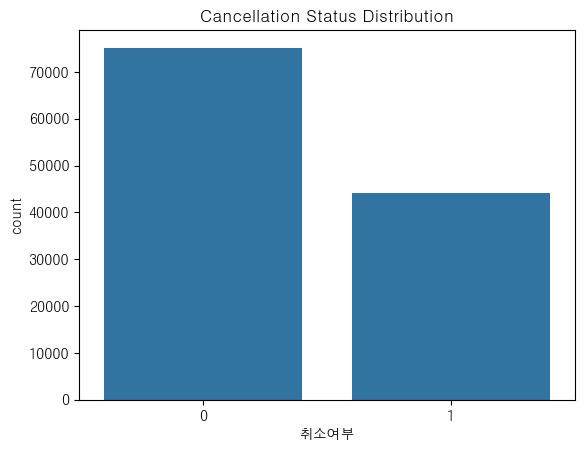

In [35]:
sns.countplot(x='취소여부', data=df)
plt.title('Cancellation Status Distribution')
plt.show()

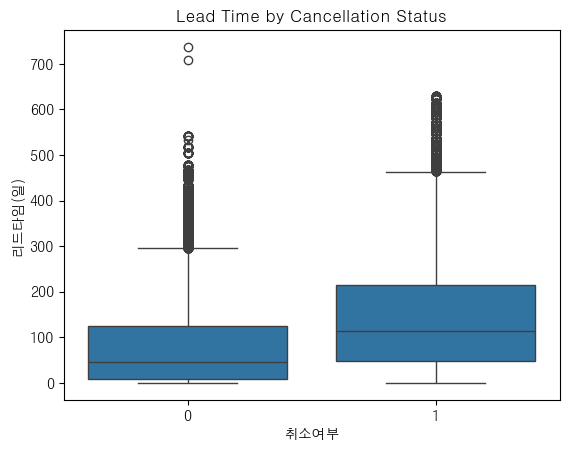

In [36]:
sns.boxplot(x='취소여부', y='리드타임(일)', data=df)
plt.title('Lead Time by Cancellation Status')
plt.show()

취소여부              0         1
식사여부                         
BB         0.626151  0.373849
FB         0.401003  0.598997
HB         0.655397  0.344603
SC         0.627606  0.372394
Undefined  0.755346  0.244654


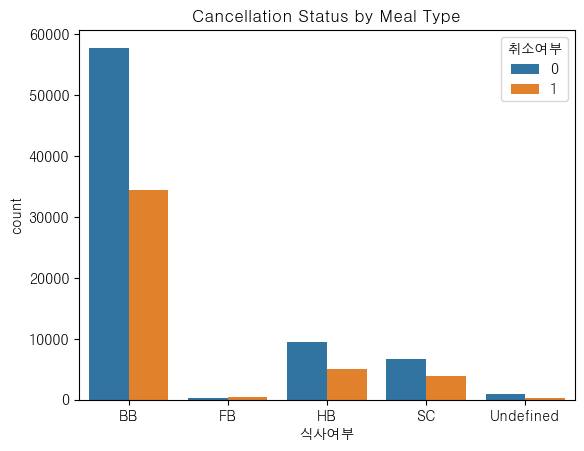

In [37]:
# 취소 비율
cancellation_rate_by_meal = df.groupby('식사여부')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_meal)

# 시각화
sns.countplot(x='식사여부', hue='취소여부', data=df)
plt.title('Cancellation Status by Meal Type')
plt.show()

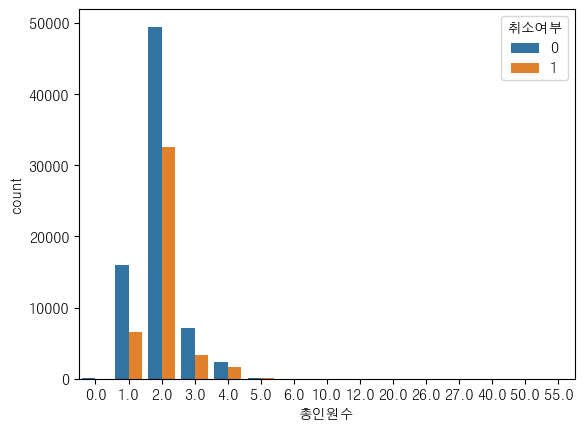

In [38]:
sns.countplot(data=df, x="총인원수", hue="취소여부")
plt.show()

취소여부         0         1
도착연도                    
2015  0.629842  0.370158
2016  0.641367  0.358633
2017  0.613021  0.386979


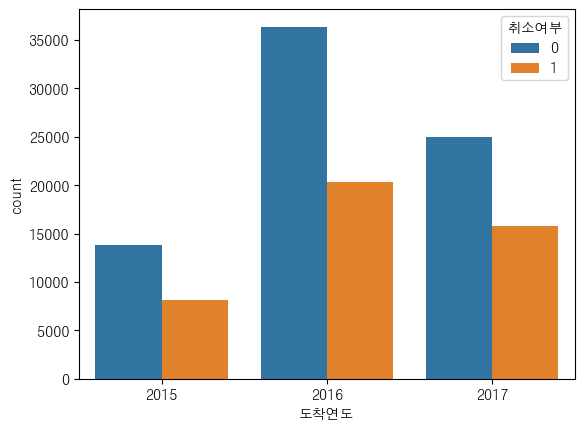

In [39]:
# 취소 비율
cancellation_rate_by_year = df.groupby('도착연도')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_year)

# 시각화
sns.countplot(data=df, x="도착연도", hue="취소여부")
plt.show()

월별 취소 비율 (1월부터 정렬):
취소여부              0         1
도착월                          
January    0.695227  0.304773
February   0.665840  0.334160
March      0.678477  0.321523
April      0.592028  0.407972
May        0.603342  0.396658
June       0.585428  0.414572
July       0.625464  0.374536
August     0.622469  0.377531
September  0.608298  0.391702
October    0.619534  0.380466
November   0.687666  0.312334
December   0.650295  0.349705


C:\Users\juwon\AppData\Local\Temp\ipykernel_20160\2250423996.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_month = df.groupby('도착월')['취소여부'].value_counts(normalize=True).unstack()


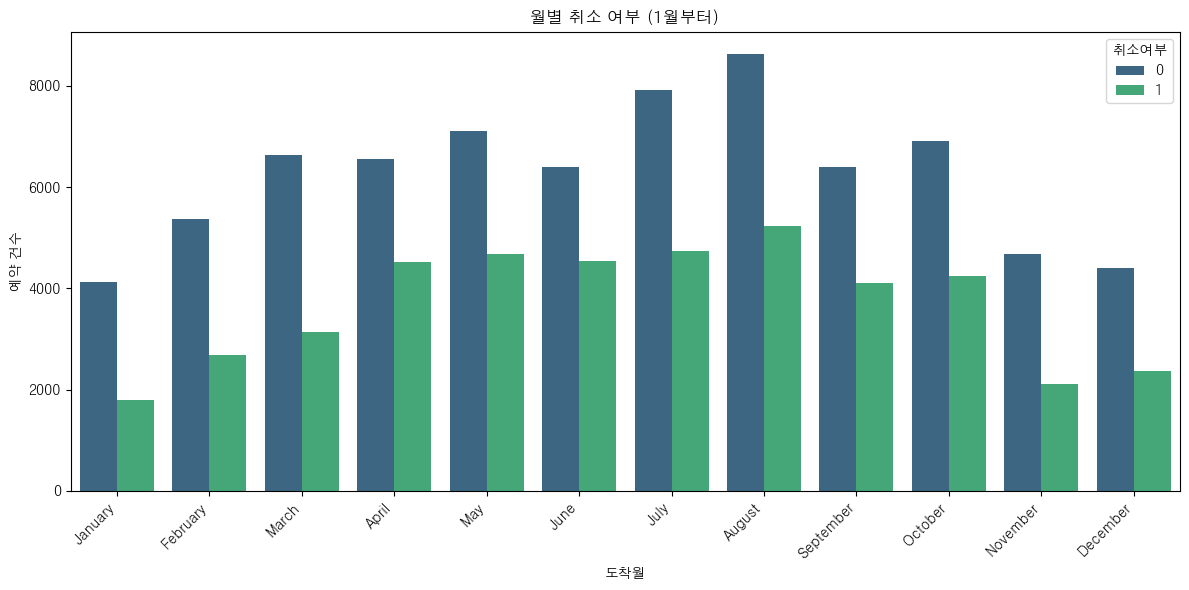

In [40]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 2. '도착월' 칼럼을 순서가 있는 범주형(Categorical)으로 변환
#    이것이 시각화와 groupby 결과의 정렬에 영향을 미칩니다.
df['도착월'] = pd.Categorical(df['도착월'], categories=month_order, ordered=True)

# 취소 비율 계산
cancellation_rate_by_month = df.groupby('도착월')['취소여부'].value_counts(normalize=True).unstack()
print("월별 취소 비율 (1월부터 정렬):")
print(cancellation_rate_by_month)

# 시각화
plt.figure(figsize=(12, 6)) # 그래프 크기 조정
sns.countplot(data=df, x="도착월", hue="취소여부", palette='viridis') # 색상 팔레트 추가
plt.title('월별 취소 여부 (1월부터)') # 제목 추가
plt.xlabel('도착월') # x축 레이블 추가
plt.ylabel('예약 건수') # y축 레이블 추가
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout() # 레이아웃 자동 조정
plt.show()



취소여부           0         1
주말숙박일수                    
0       0.624966  0.375034
1       0.640599  0.359401
2       0.625165  0.374835
3       0.647339  0.352661
4       0.677628  0.322372
5       0.455696  0.544304
6       0.431373  0.568627
7       0.263158  0.736842
8       0.433333  0.566667
9       0.363636  0.636364
10      0.714286  0.285714
12      0.800000  0.200000
13      1.000000       NaN
14      1.000000       NaN
16      0.666667  0.333333
18      1.000000       NaN
19      1.000000       NaN


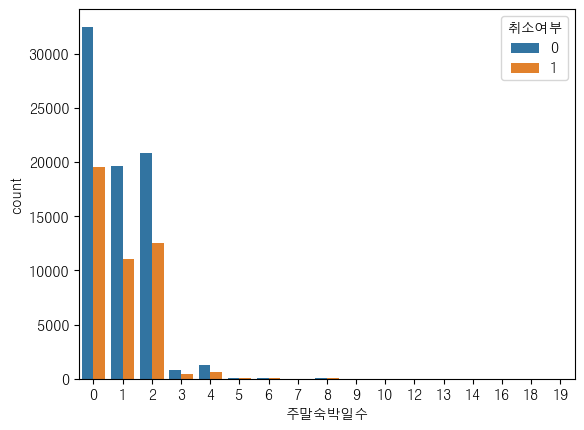

In [56]:
# 취소 비율
cancellation_rate_by_weekend = df.groupby('주말숙박일수')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_weekend)

# 시각화
sns.countplot(data=df, x="주말숙박일수", hue="취소여부")
plt.show()

취소여부           0         1
주중숙박일수                    
0       0.749771  0.250229
1       0.675652  0.324348
2       0.558425  0.441575
3       0.617890  0.382110
4       0.634529  0.365471
5       0.651440  0.348560
6       0.611741  0.388259
7       0.686103  0.313897
8       0.664634  0.335366
9       0.588745  0.411255
10      0.715251  0.284749
11      0.375000  0.625000
12      0.452381  0.547619
13      0.592593  0.407407
14      0.114286  0.885714
15      0.494118  0.505882
16      0.312500  0.687500
17      0.500000  0.500000
18      0.166667  0.833333
19      0.340909  0.659091
20      0.585366  0.414634
21      0.266667  0.733333
22           NaN  1.000000
24           NaN  1.000000
25      1.000000       NaN
26      1.000000       NaN
30      0.800000  0.200000
32      1.000000       NaN
33      1.000000       NaN
34      1.000000       NaN
35      1.000000       NaN
40      0.500000  0.500000
41      1.000000       NaN
42      1.000000       NaN
50      1.000000       NaN


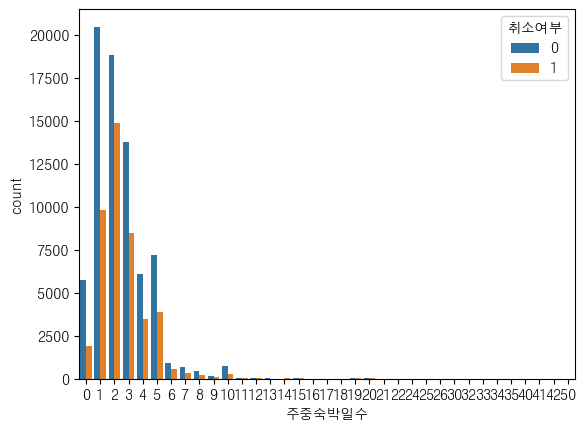

In [57]:
# 취소 비율
cancellation_rate_by_weekday = df.groupby('주중숙박일수')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_weekday)

# 시각화
sns.countplot(data=df, x="주중숙박일수", hue="취소여부")
plt.show()

취소여부          0         1
총숙박일수                    
0      0.951049  0.048951
1      0.749239  0.250761
2      0.559997  0.440003
3      0.580773  0.419227
4      0.634240  0.365760
5      0.657888  0.342112
6      0.602022  0.397978
7      0.656961  0.343039
8      0.620155  0.379845
9      0.627824  0.372176
10     0.687445  0.312555
11     0.696970  0.303030
12     0.560538  0.439462
13     0.640845  0.359155
14     0.719432  0.280568
15     0.520000  0.480000
16     0.450000  0.550000
17     0.750000  0.250000
18     0.171429  0.828571
19     0.272727  0.727273
20     0.071429  0.928571
21     0.507042  0.492958
22     0.714286  0.285714
23     0.250000  0.750000
24     0.166667  0.833333
25     0.378378  0.621622
26          NaN  1.000000
27     0.200000  0.800000
28     0.657143  0.342857
29     0.214286  0.785714
30     0.153846  0.846154
33          NaN  1.000000
34     1.000000       NaN
35     1.000000       NaN
38     1.000000       NaN
42     0.750000  0.250000
43     1.000

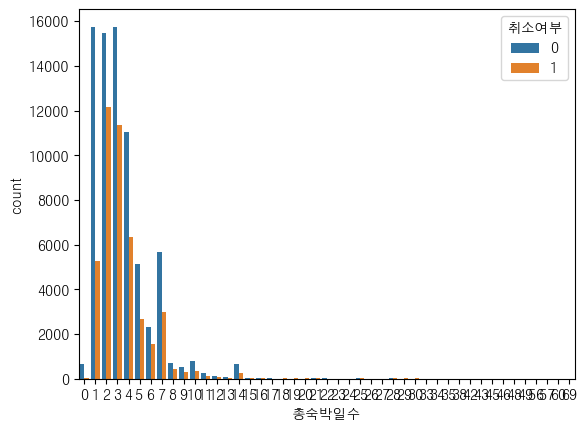

In [58]:
# 취소 비율
cancellation_rate_by_stay = df.groupby('총숙박일수')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_stay)

# 시각화
sns.countplot(data=df, x="총숙박일수", hue="취소여부")
plt.show()

취소여부             0         1
1인당평균요금                     
-3.19     1.000000       NaN
 0.00     0.896133  0.103867
 0.13     1.000000       NaN
 0.50     0.666667  0.333333
 0.74          NaN  1.000000
...            ...       ...
 289.88        NaN  1.000000
 290.56        NaN  1.000000
 510.00   1.000000       NaN
 2700.00       NaN  1.000000
 inf      1.000000       NaN

[10803 rows x 2 columns]


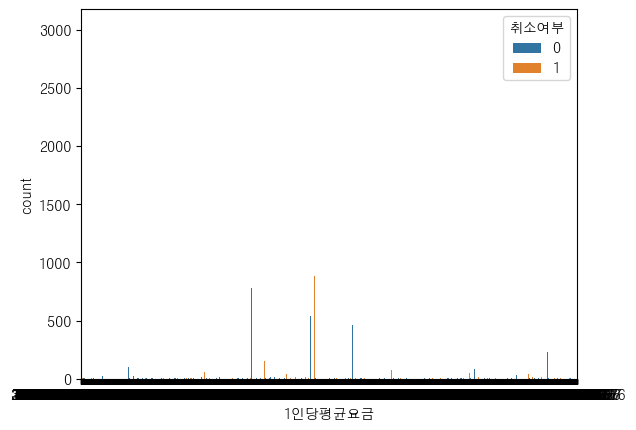

In [60]:
# 취소 비율
cancellation_rate_by_avgpay1 = df.groupby('1인당평균요금')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_avgpay1)

# 시각화
sns.countplot(data=df, x="1인당평균요금", hue="취소여부")
plt.show()

취소여부             0         1
1박당평균요금                     
-6.38     1.000000       NaN
 0.00     0.891271  0.108729
 0.26     1.000000       NaN
 0.50          NaN  1.000000
 1.00     0.800000  0.200000
...            ...       ...
 450.00        NaN  1.000000
 451.50   1.000000       NaN
 508.00   1.000000       NaN
 510.00   1.000000       NaN
 5400.00       NaN  1.000000

[8879 rows x 2 columns]


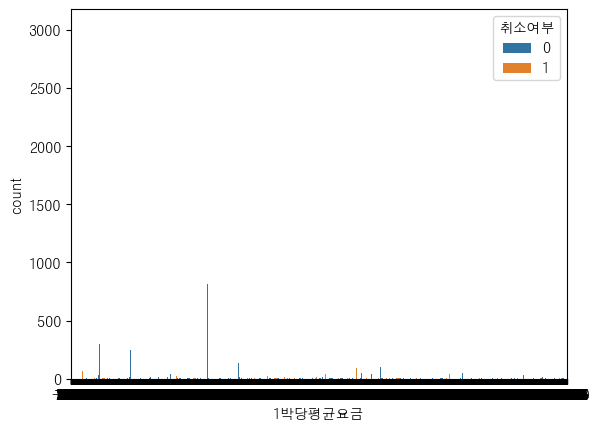

In [61]:
# 취소 비율
cancellation_rate_by_avgpay_day = df.groupby('1박당평균요금')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_avgpay_day)

# 시각화
sns.countplot(data=df, x="1박당평균요금", hue="취소여부")
plt.show()

In [71]:
# 성인수, 어린이수, 아이수가 모두 0인 경우 1인당 평균 요금을 계산할 수 없으므로 이 칼럼을 생성합니다.
df['총인원수'] = df['성인수'] + df['어린이수'] + df['아이수']

# 2. '1인당평균요금' 칼럼 생성 (이미 있다면 이 단계는 건너뛰세요)
# 0으로 나누는 것을 방지하기 위해 조건을 추가합니다.
# 총인원수가 0이 아닌 경우에만 계산하고, 0인 경우는 0 또는 NaN으로 처리할 수 있습니다.
# 여기서는 NaN으로 처리하여 평균 계산 시 제외되도록 합니다.
df['1인당평균요금'] = np.where(df['총인원수'] != 0, df['1박당평균요금'] / df['총인원수'], np.nan)

# 3. 데이터에 포함된 inf 또는 -inf 값을 NaN으로 변경
# 이 단계가 가장 중요합니다. Pandas의 mean()은 NaN은 무시하지만 inf는 무시하지 않습니다.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 4. 각 칼럼의 평균 계산
average_daily_rate_per_room = df['1박당평균요금'].mean()
average_daily_rate_per_person = df['1인당평균요금'].mean()

print(f"1박당평균요금의 전체 평균: {average_daily_rate_per_room:.2f}$")
print(f"1인당평균요금의 전체 평균: {average_daily_rate_per_person:.2f}$")

# 확인을 위해 각 칼럼의 유효한 값 개수도 출력해볼 수 있습니다.
print(f"\n1박당평균요금 칼럼의 유효한 값 개수: {df['1박당평균요금'].count()}")
print(f"1인당평균요금 칼럼의 유효한 값 개수: {df['1인당평균요금'].count()}")

1박당평균요금의 전체 평균: 101.83$
1인당평균요금의 전체 평균: 54.99$

1박당평균요금 칼럼의 유효한 값 개수: 119390
1인당평균요금 칼럼의 유효한 값 개수: 119206


In [ ]:
# 총인원수가 0인 데이터 조회
zero_occupancy_data = df[df['총인원수'] == 0]

print(f"\n총인원수가 0인 예약 건수: {len(zero_occupancy_data)}건")

zero_occupancy_data


총인원수가 0인 예약 건수: 180건


,호텔,취소여부,리드타임(일),도착연도,도착월,도착주차,도착일,주말숙박일수,주중숙박일수,성인수,...,예약대기목록에있었던기간,고객유형,1박당평균요금,요청한주차공간수,특수요청수,예약상태,예약상태가최종업데이트날짜,총인원수,총숙박일수,1인당평균요금
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0,3,NaN
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0,0,NaN
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0,3,NaN
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0,5,NaN
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0,3,NaN
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0,1,NaN
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0,2,NaN
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0,7,NaN


In [80]:
# 인원수가 0인 데이터 조회
zero_occupancy_data_all = df[
    (df['성인수'] == 0) &
    (df['어린이수'] == 0) &
    (df['아이수'] == 0)
]

print(f"\n인원수가 0인 예약 건수: {len(zero_occupancy_data_all)}건")

zero_occupancy_data_all


인원수가 0인 예약 건수: 180건


,호텔,취소여부,리드타임(일),도착연도,도착월,도착주차,도착일,주말숙박일수,주중숙박일수,성인수,...,예약대기목록에있었던기간,고객유형,1박당평균요금,요청한주차공간수,특수요청수,예약상태,예약상태가최종업데이트날짜,총인원수,총숙박일수,1인당평균요금
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0,3,NaN
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0,0,NaN
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0,3,NaN
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0,5,NaN
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0,3,NaN
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0,1,NaN
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0,2,NaN
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0,7,NaN


<Figure size 640x480 with 0 Axes>

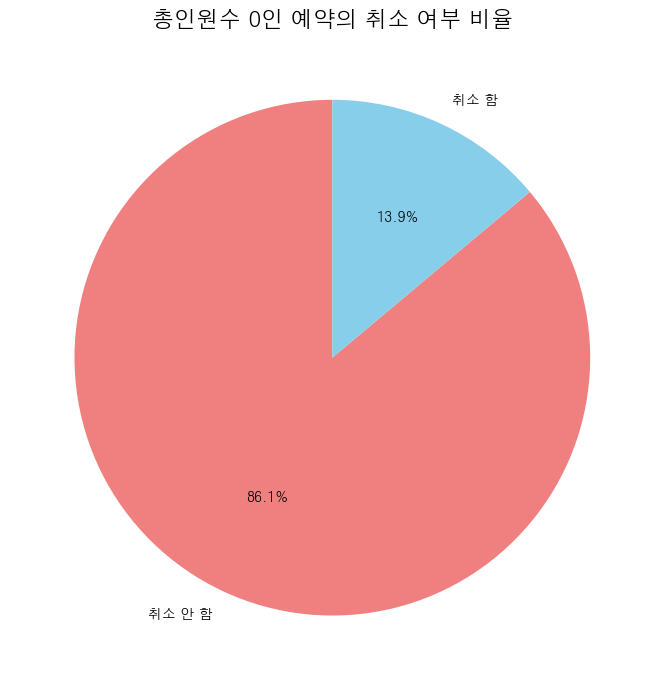

In [84]:
    # 각 바 위에 개수와 퍼센트 표시
total = len(zero_occupancy_data_all)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, # 텍스트 위치 조정
            f'{int(height)}\n({percentage})', # 표시할 텍스트 (개수 및 퍼센트)
            ha='center', va='bottom', fontsize=10)

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show()

# 2. 시각화: Pie Chart (비율) - 선택 사항, 비율을 강조하고 싶을 때
plt.figure(figsize=(7, 7))
cancellation_proportions.plot.pie(autopct='%1.1f%%', startangle=90,
                                      colors=['lightcoral', 'skyblue'], # 색상 지정
                                      labels=['취소 함' if idx == 1 else '취소 안 함' for idx in cancellation_proportions.index])
plt.title('총인원수 0인 예약의 취소 여부 비율', fontsize=16)
plt.ylabel('') # 파이 차트의 기본 y-레이블 제거
plt.tight_layout()
plt.show()

In [ ]:
"""
180개 데이터 사람이 아예없음            이상치????????

"""

취소여부         0         1
출신국                     
ABW   1.000000       NaN
AGO   0.433702  0.566298
AIA   1.000000       NaN
ALB   0.833333  0.166667
AND   0.285714  0.714286
..         ...       ...
VGB        NaN  1.000000
VNM   0.750000  0.250000
ZAF   0.612500  0.387500
ZMB   0.500000  0.500000
ZWE   0.500000  0.500000

[177 rows x 2 columns]


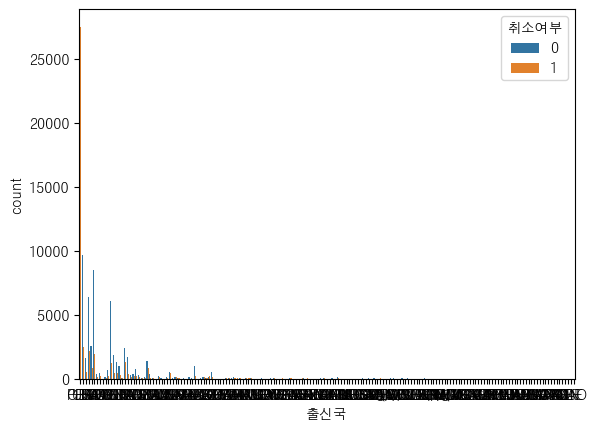

In [64]:
# 취소 비율
cancellation_rate_by_country = df.groupby('출신국')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_country)

# 시각화
sns.countplot(data=df, x="출신국", hue="취소여부")
plt.show()

취소여부                  0         1
예약방법                             
Aviation       0.780591  0.219409
Complementary  0.869448  0.130552
Corporate      0.812653  0.187347
Direct         0.846581  0.153419
Groups         0.389380  0.610620
Offline TA/TO  0.656840  0.343160
Online TA      0.632789  0.367211
Undefined           NaN  1.000000


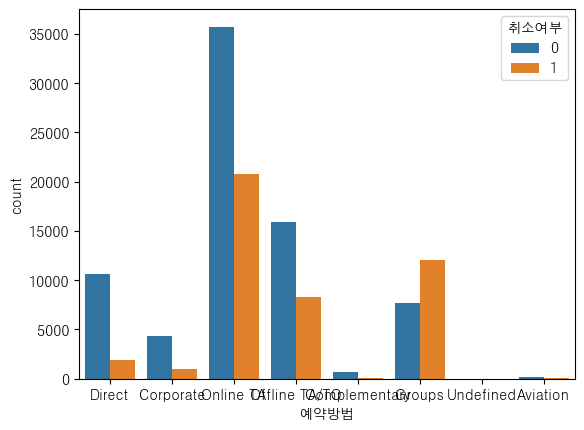

In [63]:
# 취소 비율
cancellation_rate_by_market = df.groupby('예약방법')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_market)

# 시각화
sns.countplot(data=df, x="예약방법", hue="취소여부")
plt.show()

취소여부              0         1
유통채널                         
Corporate  0.779242  0.220758
Direct     0.825401  0.174599
GDS        0.808290  0.191710
TA/TO      0.589741  0.410259
Undefined  0.200000  0.800000


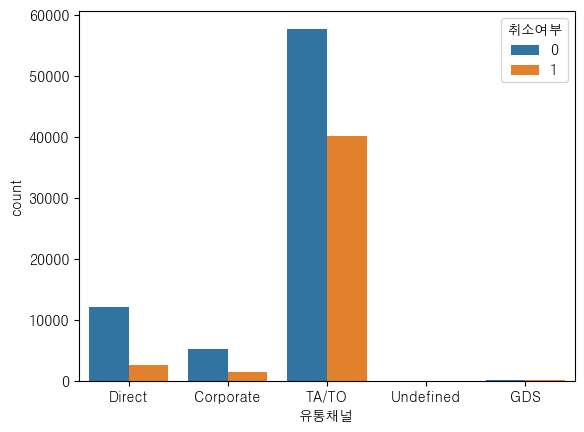

In [65]:
# 취소 비율
cancellation_rate_by_channel = df.groupby('유통채널')['취소여부'].value_counts(normalize=True).unstack()
print(cancellation_rate_by_channel)

# 시각화
sns.countplot(data=df, x="유통채널", hue="취소여부")
plt.show()

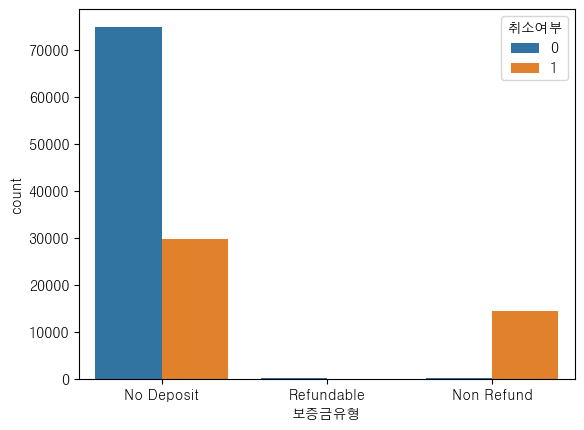

In [46]:
sns.countplot(data=df, x="보증금유형", hue="취소여부")
plt.show()

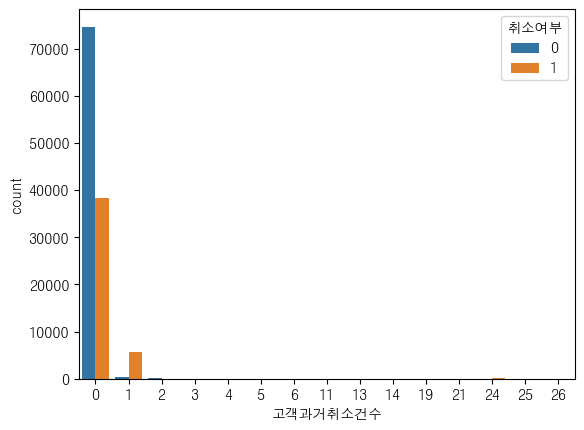

In [47]:
sns.countplot(data=df, x="고객과거취소건수", hue="취소여부")
plt.show()

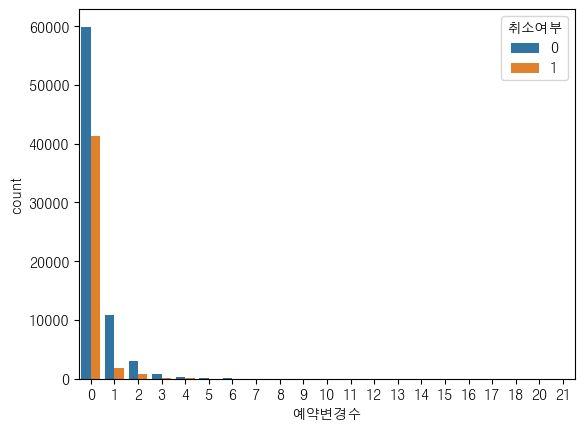

In [48]:
sns.countplot(data=df, x="예약변경수", hue="취소여부")
plt.show()

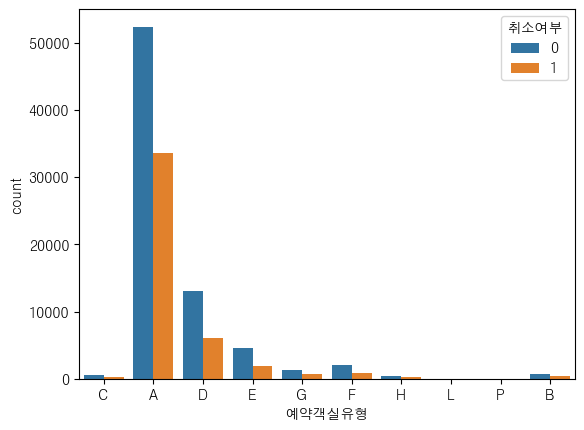

In [49]:
sns.countplot(data=df, x="예약객실유형", hue="취소여부")
plt.show()

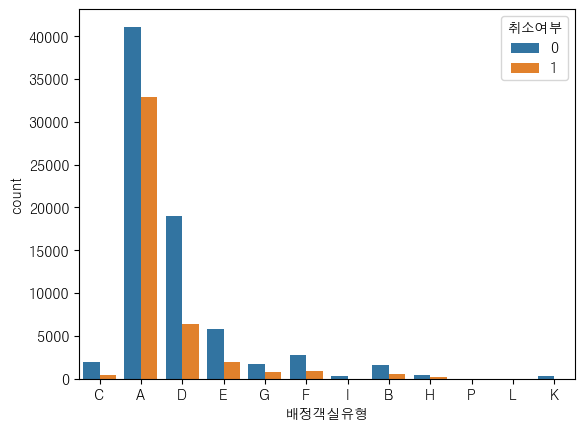

In [50]:
sns.countplot(data=df, x="배정객실유형", hue="취소여부")
plt.show()